In [58]:
import pandas as pd
from pathlib import Path
import numpy as np
import functools
import matplotlib.pyplot as plt

In [5]:
# Create Paths
student_data = Path("../student_dropout_data.csv")

# Create Data Frames
student_data_df = pd.read_csv(student_data)

student_data_df.head(10)


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,False
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,False
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,False
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,15,16,17,False
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,False


In [6]:
# Create a new column to see if any students have internet access and do paid extra classes and extracurricular activities
student_data_df["Internet & Paid Classes"] = np.where((student_data_df["Internet_Access"] == 'yes') & 
                                                                             (student_data_df['Extra_Paid_Class'] == 'yes'), True, False)

student_data_df["Internet & Extracurricular Activities"] = np.where((student_data_df["Internet_Access"] == 'yes') & 
                                                                             (student_data_df['Extra_Curricular_Activities'] == 'yes'), True, False)
student_data_df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out,Internet & Paid Classes,Internet & Extracurricular Activities
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,False,False,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,False,False,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,False,False,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,False,False,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,False,False,False


In [41]:
internet_availability = student_data_df['Internet_Access'].unique().tolist()
internet_availability

['no', 'yes']

In [49]:
internet_df = pd.DataFrame({"Internet_Access": internet_availability})

students_internet_count = pd.DataFrame(student_data_df.groupby(['Internet_Access'], as_index=False)['Dropped_Out'].count())
students_internet_count = students_internet_count.rename(columns={'Dropped_Out': 'Total Count'})

dropouts = student_data_df.loc[(student_data_df['Dropped_Out'] == True),:]
dropouts_count = pd.DataFrame(dropouts.groupby(['Internet_Access'], as_index=False)['Dropped_Out'].count())
dropouts_count = dropouts_count.rename(columns={'Dropped_Out': 'Dropped Out'})

completed = student_data_df.loc[(student_data_df['Dropped_Out'] == False),:]
completed_count = pd.DataFrame(completed.groupby(['Internet_Access'], as_index=False)['Dropped_Out'].count())
completed_count = completed_count.rename(columns={'Dropped_Out': "Completed"})

avg_final_grade = student_data_df.groupby(['Internet_Access'], as_index=False)['Final_Grade'].mean()

median_final_grade = student_data_df.groupby(['Internet_Access'], as_index=False)['Final_Grade'].median()

data_frames = [internet_df, students_internet_count, dropouts_count, completed_count, avg_final_grade, median_final_grade]
internet_availability_df = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Internet_Access'],
                                            how='outer'), data_frames)

internet_availability_df = internet_availability_df.rename(columns={'Internet_Access': 'Internet Access', 'Final_Grade_x': 'Average Final Grade', 'Final_Grade_y': 'Median Final Grade'})
internet_availability_df


,Internet Access,Total Count,Dropped Out,Completed,Average Final Grade,Median Final Grade
0,no,151,32,119,11.026490,11.0
1,yes,498,68,430,12.172691,12.0


In [50]:
internet_availability_df['Dropped Out %'] = internet_availability_df['Dropped Out'] / \
    internet_availability_df['Total Count']*100

internet_availability_df['Completed %'] = internet_availability_df['Completed'] / \
    internet_availability_df['Total Count']*100

internet_availability_df['Internet, Classes, Extracurricular'] = ['No Internet', 'Internet Access']
internet_availability_df = internet_availability_df.drop(columns=['Internet Access'])
internet_availability_df = internet_availability_df[['Internet, Classes, Extracurricular', 'Total Count', 'Dropped Out', 'Completed',
                                                     'Dropped Out %', 'Completed %', 'Average Final Grade', 'Median Final Grade']]
internet_availability_df

,"Internet, Classes, Extracurricular",Total Count,Dropped Out,Completed,Dropped Out %,Completed %,Average Final Grade,Median Final Grade
0,No Internet,151,32,119,21.192053,78.807947,11.026490,11.0
1,Internet Access,498,68,430,13.654618,86.345382,12.172691,12.0


In [51]:
students_intclass_count = student_data_df.groupby(['Internet_Access','Extra_Paid_Class'], as_index=False)['Dropped_Out'].count()
students_intclass_count = students_intclass_count.rename(columns={'Dropped_Out': 'Total Count'})

dropouts_intclass = student_data_df.loc[(student_data_df['Dropped_Out'] == True),:]
dropouts_intclass_count = dropouts_intclass.groupby(['Internet_Access','Extra_Paid_Class'], as_index=False)['Dropped_Out'].count()
dropouts_intclass_count = dropouts_intclass_count.rename(columns={'Dropped_Out': 'Dropped Out'})

completed_intclass = student_data_df.loc[(student_data_df['Dropped_Out'] == False),:]
completed_intclass_count = completed_intclass.groupby(['Internet_Access','Extra_Paid_Class'], as_index=False)['Dropped_Out'].count()
completed_intclass_count = completed_intclass_count.rename(columns={'Dropped_Out': "Completed"})

avg_final_grade_intclass = student_data_df.groupby(['Internet_Access','Extra_Paid_Class'], as_index=False)['Final_Grade'].mean()

median_final_grade_intclass = student_data_df.groupby(['Internet_Access','Extra_Paid_Class'], as_index=False)['Final_Grade'].median()

data_frames = [students_intclass_count, dropouts_intclass_count, completed_intclass_count, avg_final_grade_intclass, median_final_grade_intclass]

intclass_df = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Internet_Access','Extra_Paid_Class'],
                                            how='outer'), data_frames)

intclass_df = intclass_df.rename(columns={'Internet_Access': 'Internet Access', 'Extra_Paid_Class': 'Extra Paid Class',
                                                                     'Final_Grade_x': 'Average Final Grade', 'Final_Grade_y': 'Median Final Grade'})
intclass_df

,Internet Access,Extra Paid Class,Total Count,Dropped Out,Completed,Average Final Grade,Median Final Grade
0,no,no,144,28,116,11.131944,11.0
1,no,yes,7,4,3,8.857143,9.0
2,yes,no,466,63,403,12.203863,12.0
3,yes,yes,32,5,27,11.718750,12.0


In [52]:
intclass_df['Dropped Out %'] = intclass_df['Dropped Out'] / \
    intclass_df['Total Count']*100

intclass_df['Completed %'] = intclass_df['Completed'] / \
    intclass_df['Total Count']*100

intclass_df['Internet, Classes, Extracurricular'] = ['No Internet, No Paid Class', 'No Internet, Paid Classes', 'Internet, No Paid Classes',
                                                     'Internet, Paid Classes']
intclass_df = intclass_df.drop(columns=['Internet Access', 'Extra Paid Class'])
intclass_df = intclass_df[['Internet, Classes, Extracurricular', 'Total Count', 'Dropped Out', 'Completed',
                                                     'Dropped Out %', 'Completed %', 'Average Final Grade', 'Median Final Grade']]

intclass_df

,"Internet, Classes, Extracurricular",Total Count,Dropped Out,Completed,Dropped Out %,Completed %,Average Final Grade,Median Final Grade
0,"No Internet, No Paid Class",144,28,116,19.444444,80.555556,11.131944,11.0
1,"Internet Access, Paid Classes",7,4,3,57.142857,42.857143,8.857143,9.0
2,"Internet, No Paid Classes",466,63,403,13.519313,86.480687,12.203863,12.0
3,"Internet Classes, Paid Classes",32,5,27,15.625000,84.375000,11.718750,12.0


In [53]:
students_int_ext_count = student_data_df.groupby(['Internet_Access','Extra_Curricular_Activities'], as_index=False)['Dropped_Out'].count()
students_int_ext_count = students_int_ext_count.rename(columns={'Dropped_Out': 'Total Count'})

dropouts_int_ext = student_data_df.loc[(student_data_df['Dropped_Out'] == True),:]
dropouts_int_ext_count = dropouts_int_ext.groupby(['Internet_Access','Extra_Curricular_Activities'], as_index=False)['Dropped_Out'].count()
dropouts_int_ext_count = dropouts_int_ext_count.rename(columns={'Dropped_Out': 'Dropped Out'})

completed_int_ext = student_data_df.loc[(student_data_df['Dropped_Out'] == False),:]
completed_int_ext_count = completed_int_ext.groupby(['Internet_Access','Extra_Curricular_Activities'], as_index=False)['Dropped_Out'].count()
completed_int_ext_count = completed_int_ext_count.rename(columns={'Dropped_Out': "Completed"})

avg_final_grade_int_ext = student_data_df.groupby(['Internet_Access','Extra_Curricular_Activities'], as_index=False)['Final_Grade'].mean()

median_final_grade_int_ext = student_data_df.groupby(['Internet_Access','Extra_Curricular_Activities'], as_index=False)['Final_Grade'].median()

data_frames = [students_int_ext_count, dropouts_int_ext_count, completed_int_ext_count, avg_final_grade_int_ext, median_final_grade_int_ext]

int_ext_df = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Internet_Access','Extra_Curricular_Activities'],
                                            how='outer'), data_frames)

int_ext_df = int_ext_df.rename(columns={'Internet_Access': 'Internet Access', 'Extra_Curricular_Activities': 'Extracurricular Activities',
                                                                     'Final_Grade_x': 'Average Final Grade', 'Final_Grade_y': 'Median Final Grade'})
int_ext_df

,Internet Access,Extracurricular Activities,Total Count,Dropped Out,Completed,Average Final Grade,Median Final Grade
0,no,no,89,18,71,10.910112,11.0
1,no,yes,62,14,48,11.193548,11.0
2,yes,no,245,39,206,12.012245,12.0
3,yes,yes,253,29,224,12.328063,12.0


In [54]:
int_ext_df['Dropped Out %'] = int_ext_df['Dropped Out'] / \
    int_ext_df['Total Count']*100

int_ext_df['Completed %'] = int_ext_df['Completed'] / \
    int_ext_df['Total Count']*100

int_ext_df['Internet, Classes, Extracurricular'] = ['No Internet, No Extracurricular Activities', 'No Internet, Extracurricular Activities', 
                                                    'Internet, No Extracurricular Activities', 'Internet, Extracurricular Activities']
int_ext_df = int_ext_df.drop(columns=['Internet Access', 'Extracurricular Activities'])
int_ext_df = int_ext_df[['Internet, Classes, Extracurricular', 'Total Count', 'Dropped Out', 'Completed',
                                                     'Dropped Out %', 'Completed %', 'Average Final Grade', 'Median Final Grade']]

int_ext_df

,"Internet, Classes, Extracurricular",Total Count,Dropped Out,Completed,Dropped Out %,Completed %,Average Final Grade,Median Final Grade
0,"No Internet, No Extracurricular Activities",89,18,71,20.224719,79.775281,10.910112,11.0
1,"No Internet, Extracurricular Activities",62,14,48,22.580645,77.419355,11.193548,11.0
2,"Internet, No Extracurricular Activities",245,39,206,15.918367,84.081633,12.012245,12.0
3,"Internet, Extracurricular Activities",253,29,224,11.462451,88.537549,12.328063,12.0


In [57]:
frames = [internet_availability_df, int_ext_df, intclass_df]

student_merged_data_df = pd.concat(frames)
student_merged_data_df

,"Internet, Classes, Extracurricular",Total Count,Dropped Out,Completed,Dropped Out %,Completed %,Average Final Grade,Median Final Grade
0,No Internet,151,32,119,21.192053,78.807947,11.026490,11.0
1,Internet Access,498,68,430,13.654618,86.345382,12.172691,12.0
0,"No Internet, No Extracurricular Activities",89,18,71,20.224719,79.775281,10.910112,11.0
1,"No Internet, Extracurricular Activities",62,14,48,22.580645,77.419355,11.193548,11.0
2,"Internet, No Extracurricular Activities",245,39,206,15.918367,84.081633,12.012245,12.0
3,"Internet, Extracurricular Activities",253,29,224,11.462451,88.537549,12.328063,12.0
0,"No Internet, No Paid Class",144,28,116,19.444444,80.555556,11.131944,11.0
1,"Internet Access, Paid Classes",7,4,3,57.142857,42.857143,8.857143,9.0
2,"Internet, No Paid Classes",466,63,403,13.519313,86.480687,12.203863,12.0
3,"Internet Classes, Paid Classes",32,5,27,15.625000,84.375000,11.718750,12.0


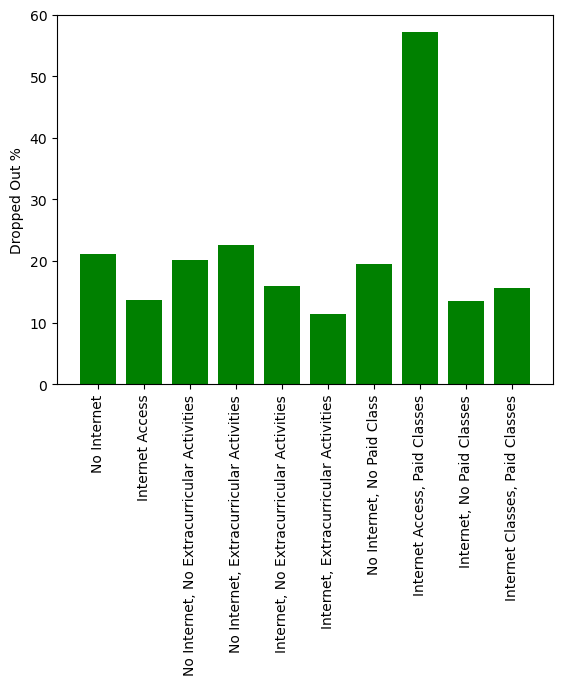

In [65]:
plt.bar(student_merged_data_df['Internet, Classes, Extracurricular'], student_merged_data_df['Dropped Out %'], color = 'green')
plt.xticks(rotation=90)
plt.ylabel('Dropped Out %')
plt.show()

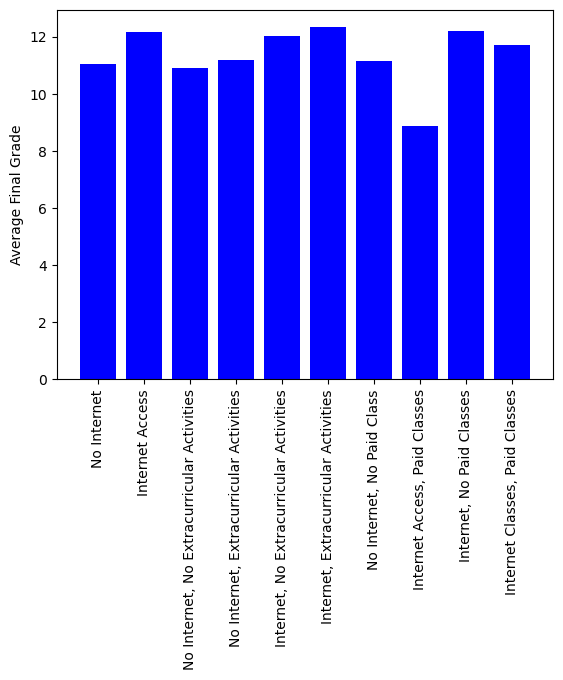

In [66]:
plt.bar(student_merged_data_df['Internet, Classes, Extracurricular'], student_merged_data_df['Average Final Grade'], color = 'blue')
plt.xticks(rotation=90)
plt.ylabel('Average Final Grade')
plt.show()